In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
ppp = os.path.abspath('../../visualization')

sys.path.insert(1, p)
sys.path.insert(1, pp)
sys.path.insert(1, ppp)



In [2]:
import json
import pandas as pd
from utils.salary import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mticker

 

In [3]:
output_dir = './fig/'
colors = plt.get_cmap('tab20').colors 

In [4]:
# test.json 내용: [{"name":"Jack","age":26},{"name":"Ace","age":87}]
df = pd.read_json('../../visualization/result/tag/salary.json') ## pd.read_json 이용

In [5]:
tag_info = load_json("../../visualization/result/tag/tag_info.json")

In [6]:
df = df.reset_index().rename(columns={'index':'year'})

In [7]:
df = df.sort_values(by = 'year').reset_index(drop=True)

In [8]:
# def get_CID_df_all_data(df, year) : 
#     # 모든 데이터가 다 존재하는 경우에만 CID계산 
#     year_list = [year-2, year-1, year]
#     print(year_list)
#     df = df = df[df['year'].isin(year_list)]
#     df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
#     df_salary = df_salary.dropna()

#     filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
#     filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
#     filtered_df = filtered_df.dropna().reset_index(drop=True)

#     filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
#     filtered_df = filtered_df.dropna().reset_index(drop=True)

#     return filtered_df




In [9]:
def get_CID_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [10]:
def get_CID_ratio_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df['salary_ratio'] = filtered_df.groupby(['lang'])['salary'].transform(lambda x: x/x.shift(1) )
    filtered_df = filtered_df.dropna()

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary_ratio'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df

In [11]:
def get_CID_log_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()
    df_salary['salary'] = np.log(df_salary['salary'])

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [12]:
def get_CID_ratio_rel_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    valid_langs = df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index
    filtered_df = df_salary[df_salary['lang'].isin(valid_langs)].copy()

    # 언어별로 연도 정렬 후 상대 변화율(성장률) 계산
    filtered_df.sort_values(by=['lang', 'year'], inplace=True)
    filtered_df['growth_rate'] = filtered_df.groupby('lang')['salary'].pct_change()

    # growth_rate의 이차 차분 = CID 계산
    filtered_df['CID'] = filtered_df.groupby('lang')['growth_rate'].diff()
    filtered_df['CID'] = filtered_df.groupby('lang')['CID'].diff()

    # 최종 정리: CID 계산이 가능한 연도만 남김
    filtered_df = filtered_df.dropna(subset=['growth_rate', 'CID']).reset_index(drop=True)


    return filtered_df




In [13]:
def filter_df( df, type ) :
    tot_filtered_df = pd.DataFrame()
    for year in [ 2022, 2023, 2024] : 
        if type == 'ratio' : 
            filtered_df = get_CID_ratio_df(df, year)
        elif type == 'log' : 
            filtered_df = get_CID_log_df(df, year)
        elif type == 'ratio_rel' :
            filtered_df = get_CID_ratio_rel_df(df, year)
            
        else :
            filtered_df = get_CID_df(df, year)
            
        tot_filtered_df = pd.concat([tot_filtered_df, filtered_df], axis = 0)
    
        tot_exist_df = tot_filtered_df[tot_filtered_df['lang'].isin(tot_filtered_df['lang'].value_counts()[lambda x: x == len([ 2022, 2023, 2024])].index)].copy()
        tot_exist_df=  tot_exist_df.sort_values(by = ['year', 'CID'], ascending=[False, True])
    return tot_exist_df

In [14]:
tot_df_r = filter_df(df, 'ratio')
tot_df_log = filter_df(df, 'log')
tot_df_nr = filter_df(df, 'notratio')
tot_df_rl = filter_df(df, 'ratio_rel')

[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]
[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]


In [21]:
tot_df_r

,year,lang,salary,salary_ratio,CID
18,2024,r,64444.0,0.859677,-0.214508
26,2024,javascript,63694.0,0.860334,-0.184145
31,2024,java,61714.0,0.848874,-0.158457
24,2024,kotlin,65815.0,0.841549,-0.156219
19,2024,typescript,65907.0,0.854781,-0.151883
17,2024,python,67723.0,0.864575,-0.142707
29,2024,html/css,61485.0,0.876504,-0.108468
28,2024,c,63694.0,0.856666,-0.093347
25,2024,c++,64444.0,0.859677,-0.086999
21,2024,c#,66066.0,0.881315,-0.084402


In [20]:
tot_df_rl

,year,lang,salary,growth_rate,CID
28,2024,r,64444.0,-0.140323,-0.214508
18,2024,javascript,63694.0,-0.139666,-0.184145
17,2024,java,61714.0,-0.151126,-0.158457
20,2024,kotlin,65815.0,-0.158451,-0.156219
34,2024,typescript,65907.0,-0.145219,-0.151883
27,2024,python,67723.0,-0.135425,-0.142707
16,2024,html/css,61485.0,-0.123496,-0.108468
2,2024,c,63694.0,-0.143334,-0.093347
4,2024,c++,64444.0,-0.140323,-0.086999
3,2024,c#,66066.0,-0.118685,-0.084402


In [15]:
def draw_bar_garph_for_df (df):
    lang    = df[df['year'] ==2024].sort_values(by = ['year', 'CID'], ascending=[False, True])['lang'].values
    years = [2022, 2023, 2024]
    CID_dict = dict()
    bar_dict = dict()

    for year in years :
        CID_dict[year] = df.loc[(df['year']== year)  & (df['lang'].isin(lang)), 'CID'].values

    x = np.arange(len(lang))

    # Figure 설정
    fig, ax = plt.subplots(figsize=(20, 8), dpi=150)

    # 막대 그리기
    width = 0.3
    width_gap = width/2


    bar1 = ax.bar(x - width- width_gap, CID_dict[2022], width=width, color=colors[0], label='2022')
    bar2 = ax.bar(x - width_gap, CID_dict[2023], width=width, color=colors[2], label='2023')
    bar3 = ax.bar(x + width_gap, CID_dict[2024], width=width, color=colors[4], label='2024')

    for rect in bar3:
        height = rect.get_height()
        if height != 0:
            ax.text(rect.get_x() + rect.get_width()/2., 1.02*np.sign(height)*abs(height), "{:,}".format(int(height)) if int(height) >0 else  "{0:0.4f}".format(float(height))
                    , ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)
        

    # x축 설정
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_xticks(x)
    ax.set_xticklabels(lang, rotation=45, ha='right')

    # # y축, 제목, 범례 설정
    ax.set_ylabel('CID for Salary Growth')
    # ax.set_title('CID Result for Median Salary in Stack Overflow Survey', fontsize=14)
    ax.legend()

    def thousands_formatter(x, pos):
        return  "{:,}".format(int(x)) 

    # ax.yaxis.set_major_formatter(mticker.FuncFormatter(thousands_formatter))

    # 그리드 추가
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f"{output_dir}Result_Fig11.png", dpi=300, bbox_inches='tight')


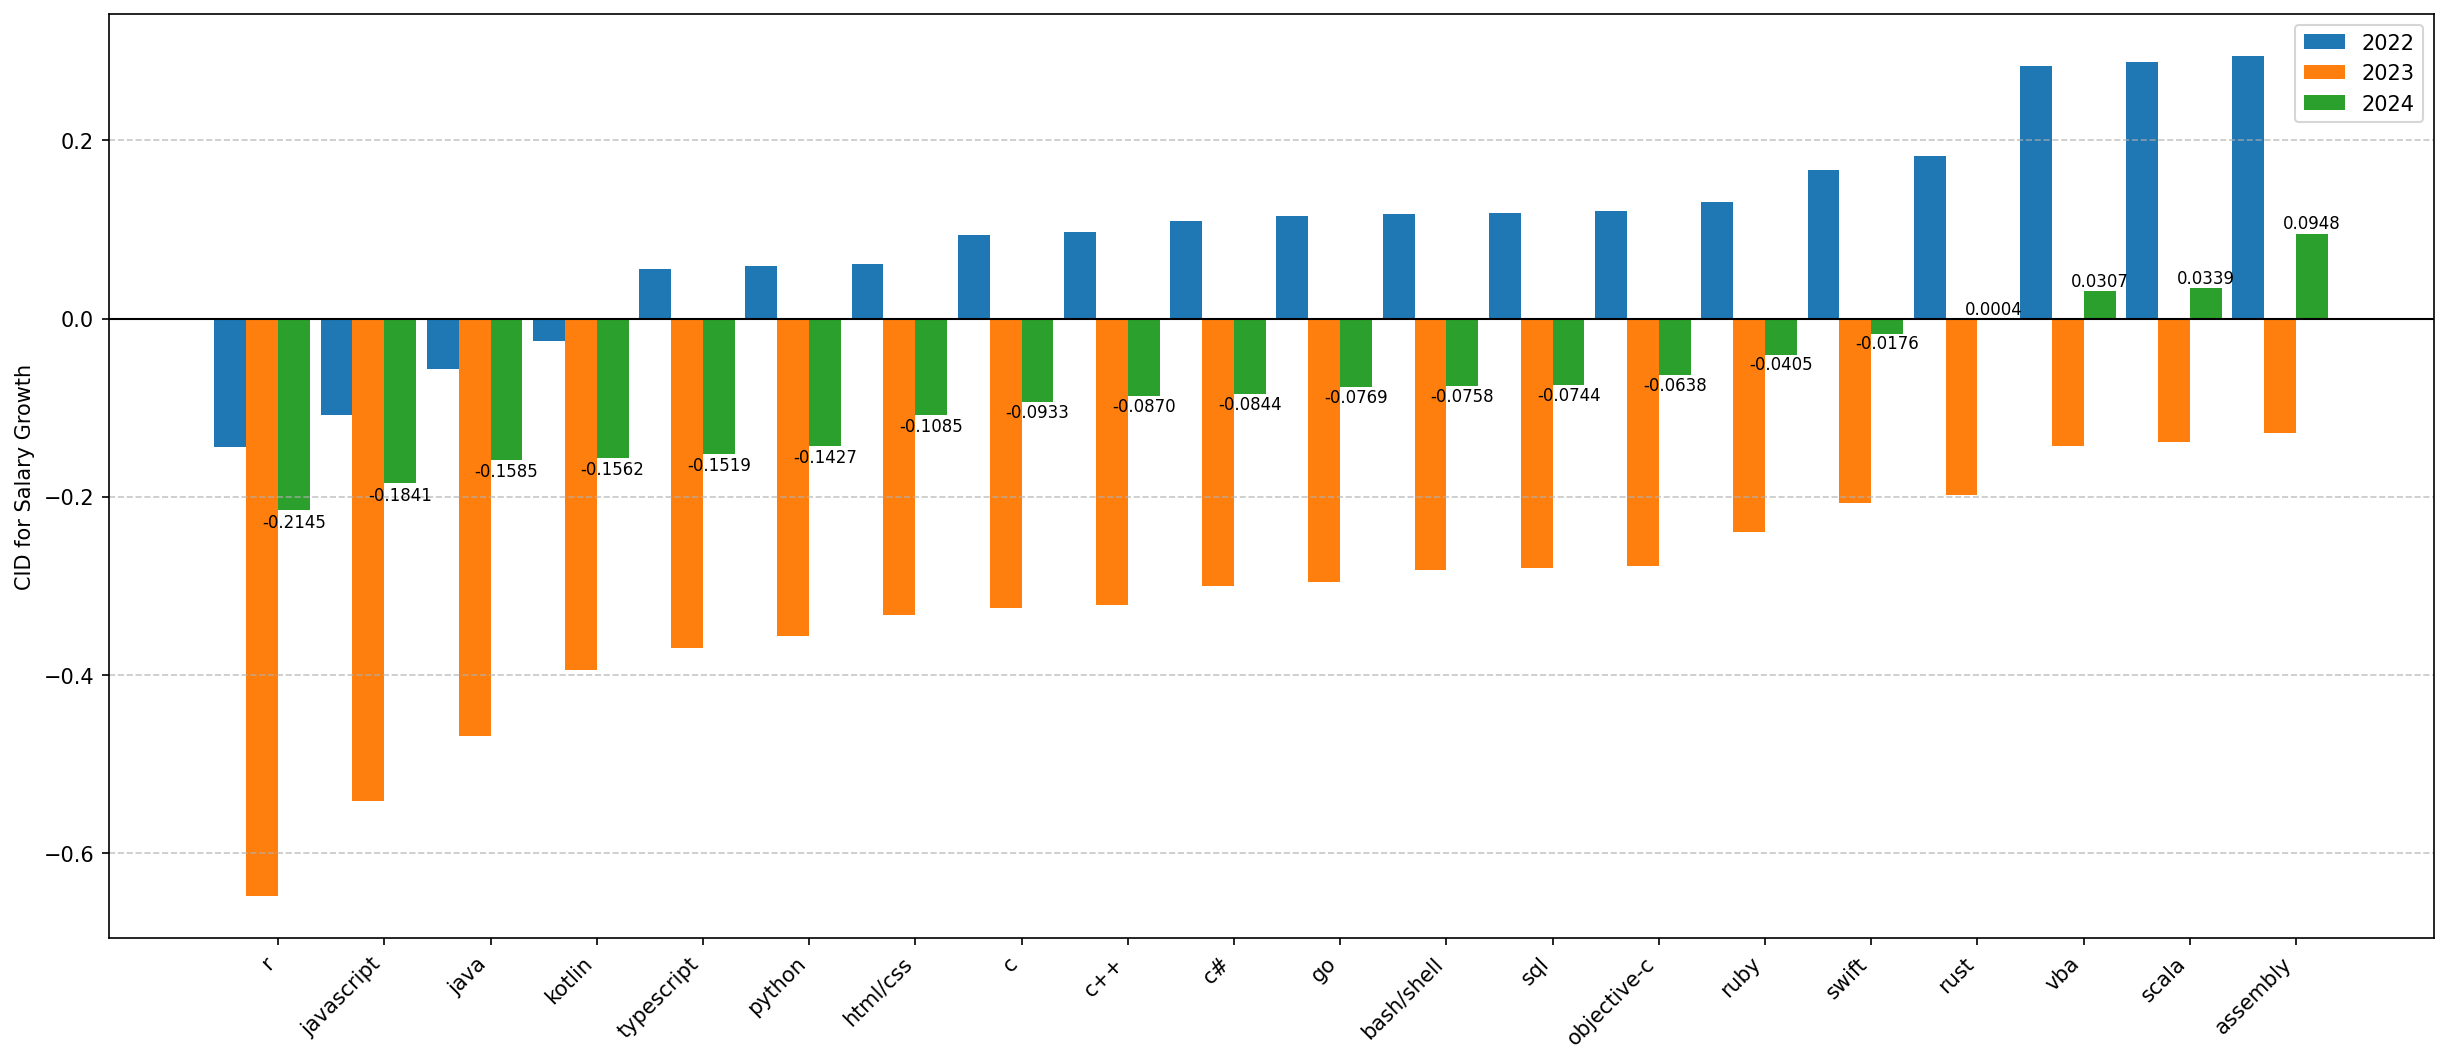

In [16]:
draw_bar_garph_for_df(tot_df_rl)

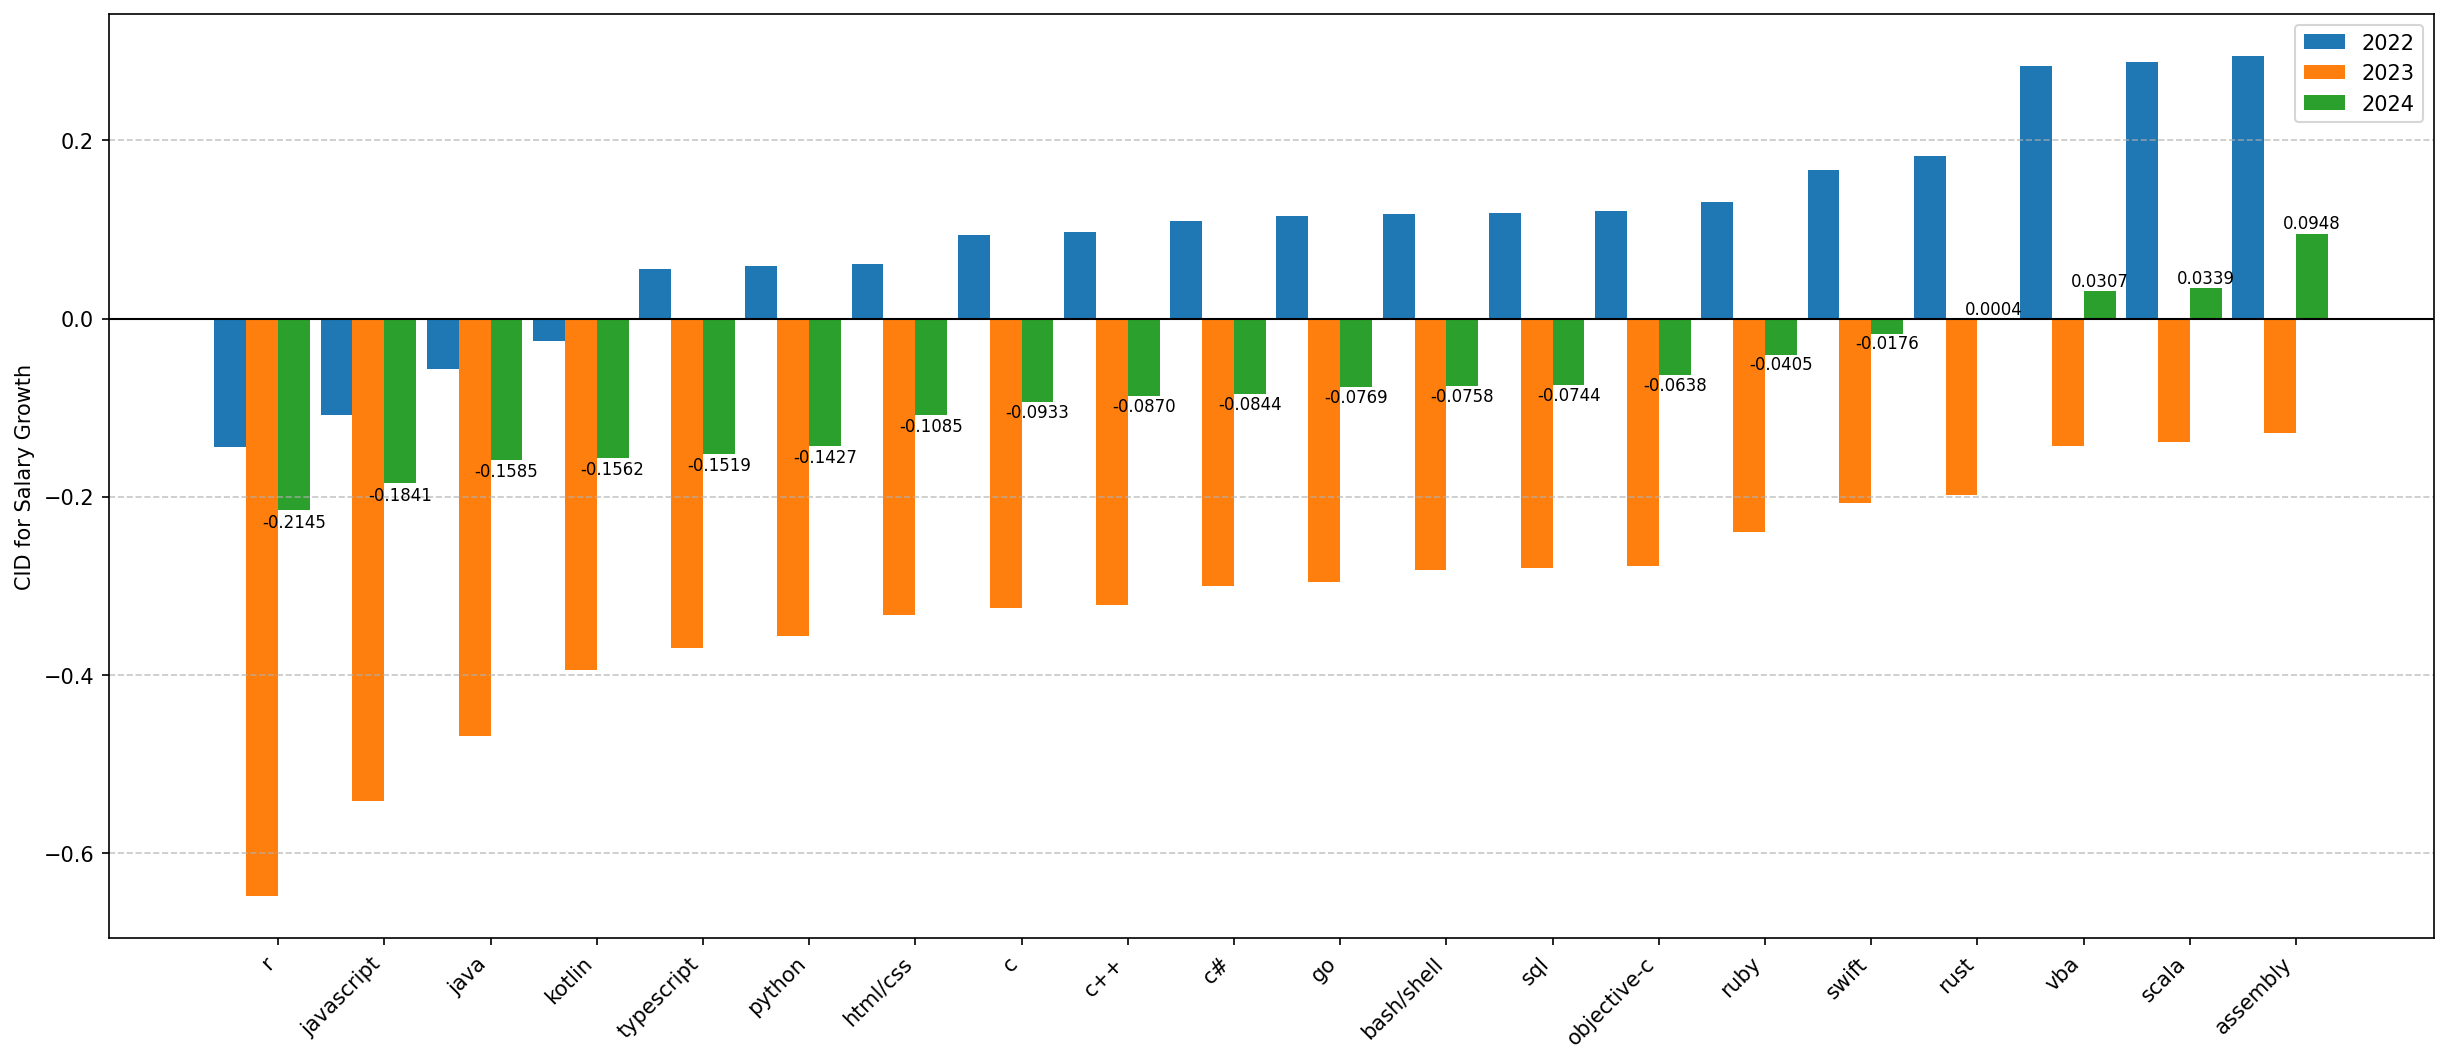

In [17]:
draw_bar_garph_for_df(tot_df_r)

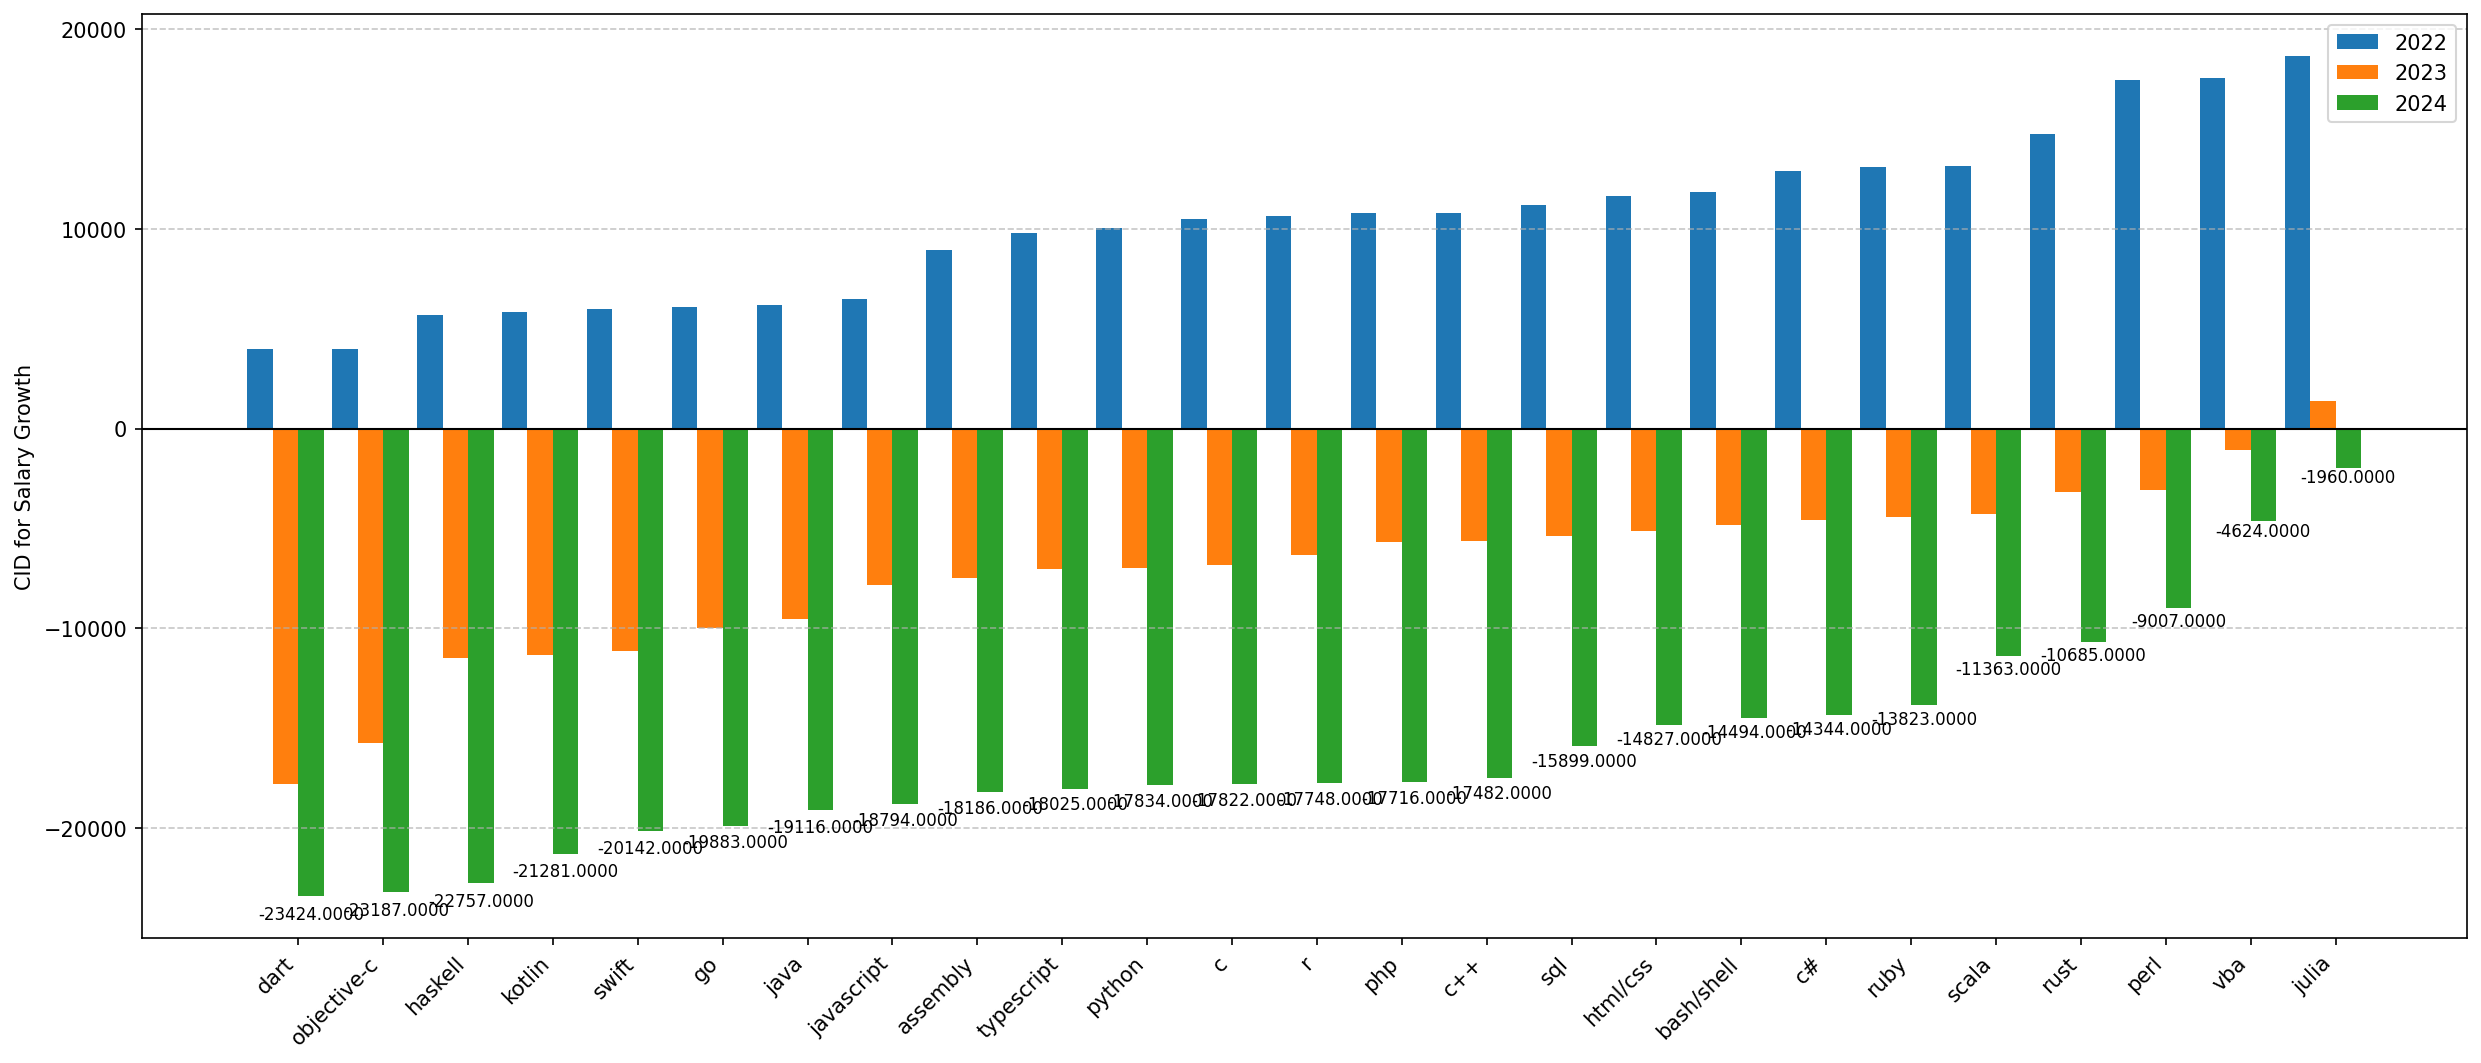

In [18]:
draw_bar_garph_for_df(tot_df_nr)

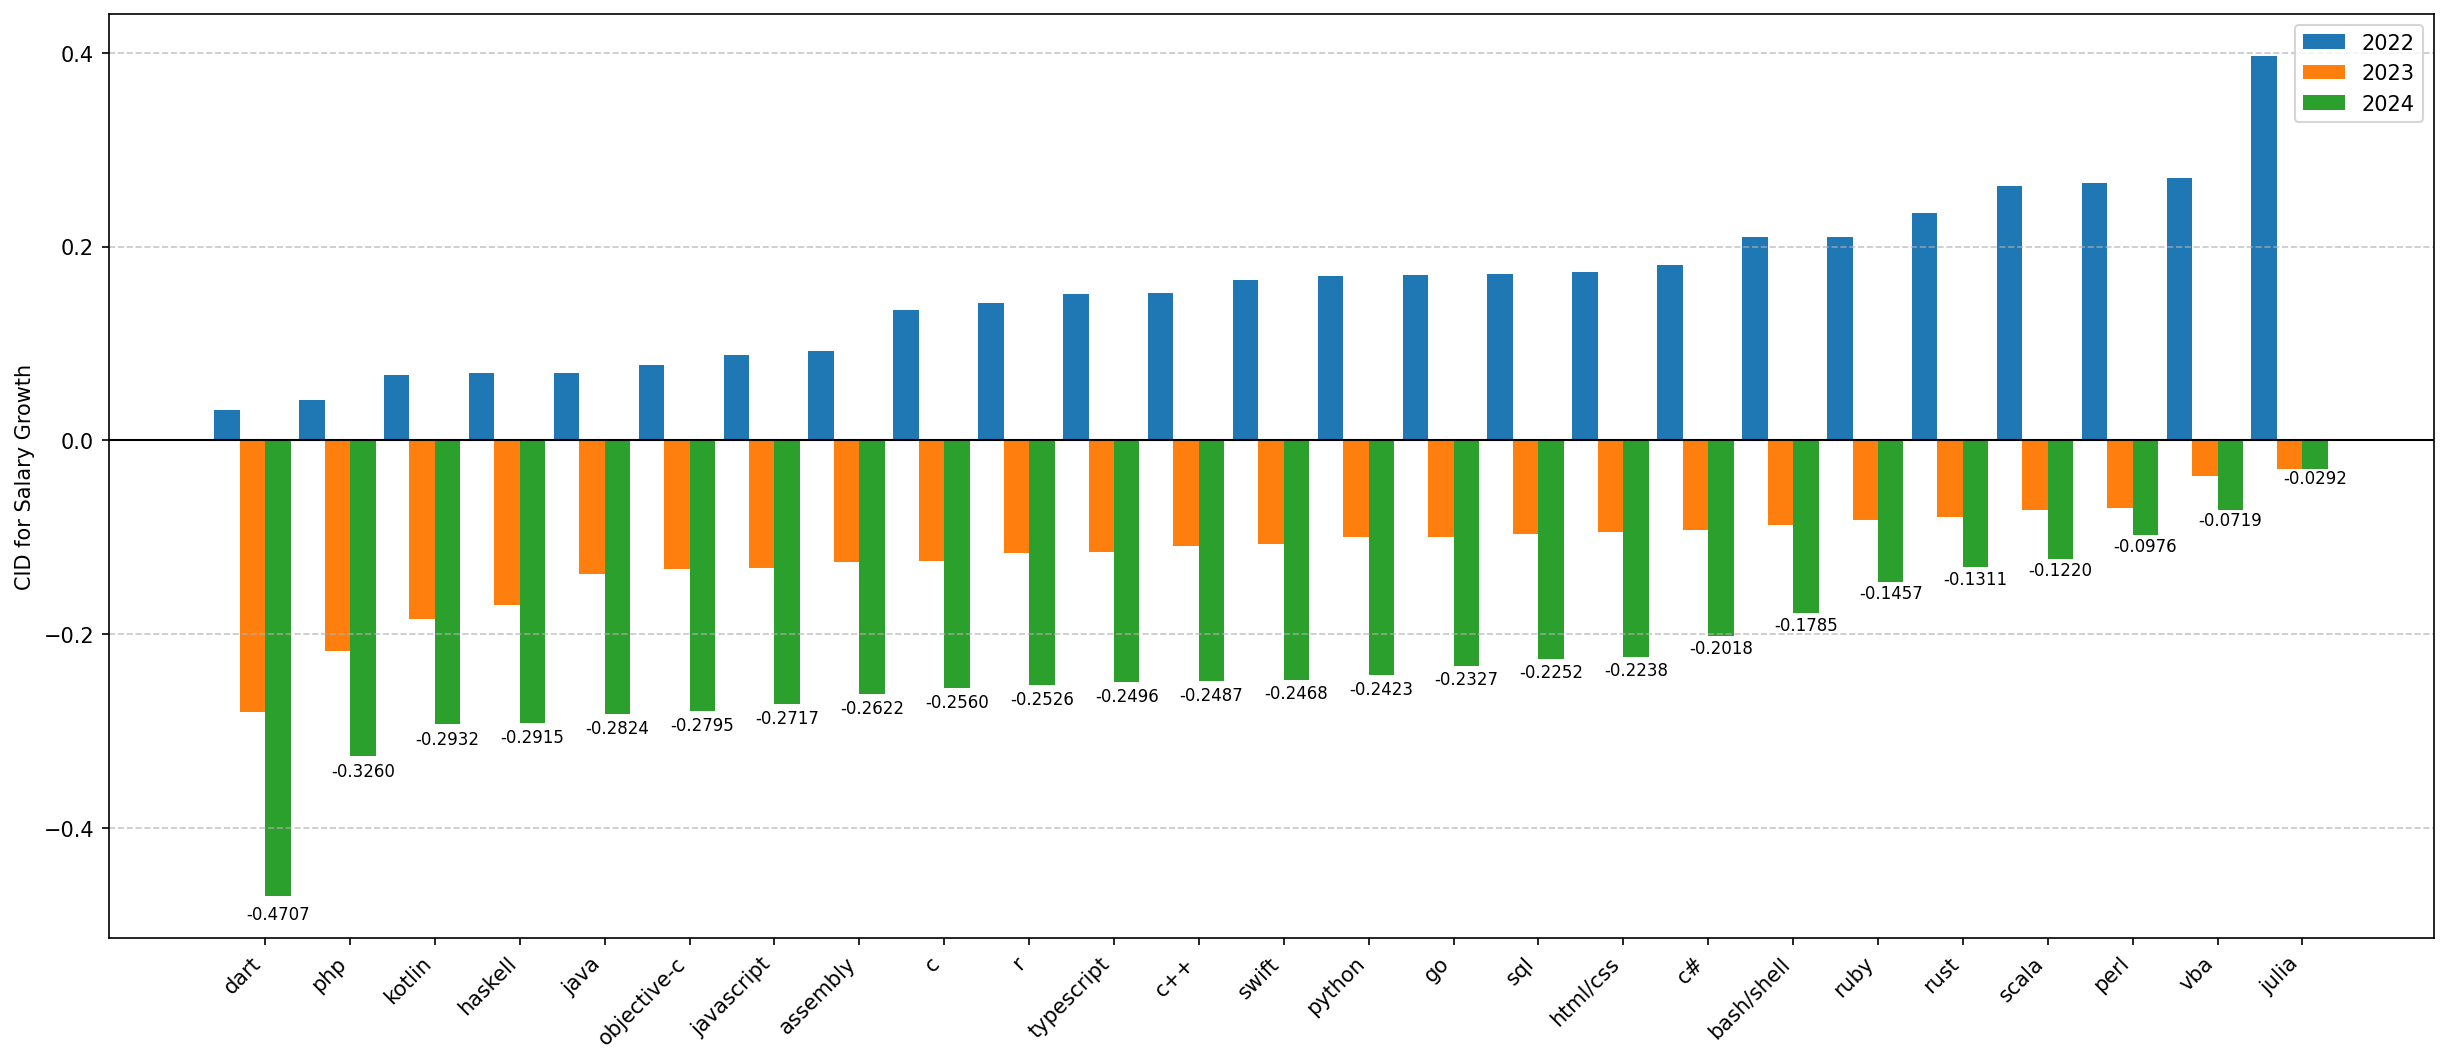

In [19]:
draw_bar_garph_for_df(tot_df_log)